In [1]:
%load_ext autoreload
%autoreload 2
import torch
from torch import Tensor
import torchvision
import matplotlib.pyplot as plt
import statistics
import random
import time
import math
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 10
import toolset as ts
from toolset import *
from toolset.utils import *
from toolset.data import *
from toolset.helper import *
from toolset.solver import *
reset_seed(0)
data_dict = ts.data.preprocess_cifar10(cuda=True, dtype=torch.float64, flatten=False,show_examples=False)
print('Train data shape: ', data_dict['X_train'].shape)
print('Train labels shape: ', data_dict['y_train'].shape)
print('Validation data shape: ', data_dict['X_val'].shape)
print('Validation labels shape: ', data_dict['y_val'].shape)
print('Test data shape: ', data_dict['X_test'].shape)
print('Test labels shape: ', data_dict['y_test'].shape)
from convolutional_networks import DeepConvNet
from fully_connected_networks import adam
from convolutional_networks import *
# num_train = 50
# small_data = {
#   'X_train': data_dict['X_train'][:num_train],
#   'y_train': data_dict['y_train'][:num_train],
#   'X_val': data_dict['X_val'][:50],
#   'y_val': data_dict['y_val'][:50],
# }
# input_dims = data_dict['X_train'].shape[1:]

Train data shape:  torch.Size([40000, 3, 32, 32])
Train labels shape:  torch.Size([40000])
Validation data shape:  torch.Size([10000, 3, 32, 32])
Validation labels shape:  torch.Size([10000])
Test data shape:  torch.Size([10000, 3, 32, 32])
Test labels shape:  torch.Size([10000])


In [2]:
net = None
reset_seed(0)  # 模型加载时也用了torch，保证相同
input_dims = data_dict['X_train'].shape[1:]

# net = VggNet(input_dims=input_dims,
#              weight_scale='kaiming',
#              device='cuda',
#              reg=1e-4)

In [3]:

def test():
  test_net = None
  test_net = VggNet(
      num_filters=(8, 8, 8, 8, 8),
      max_pools=(0,1,2,3,4),
      num_FC=(72,10),
      weight_scale='kaiming_init',
      reg=1e-5,
      dropout=0.5,
      device='cuda'
  )

  solver = Solver(test_net, small_data,
                  num_epochs=1000, batch_size=50,
                  optim_config={
                  'learning_rate': 0.01,
                  },
                  update_rule=adam,
                  verbose=True, device='cuda',print_every=1000, )
  solver.train(time_limit=20)


In [6]:
num_train = 50
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'][:50],
  'y_val': data_dict['y_val'][:50],
}

In [11]:

net = None
reset_seed(0)  # 模型加载时也用了torch，保证相同
net = VggNet(
    num_filters = (64, 64, 
                   128, 128, 
                   256, 256, 256, 256,
                   512, 512, 512, 512,
                   512, 512, 512, 512
                   ),
    max_pools = (1, 3, 7, 11, 15),
    num_FC = (4096, 4096, 10),
    weight_scale = 'kaiming',
    dropout=0.5,
    reg = 1e-5,
    device = 'cuda'
)
solver = Solver(net, small_data,
                num_epochs=1000, batch_size=50,
                optim_config={
                'learning_rate': 1e-4,
                },
                update_rule=adam,
                verbose=True, device='cuda',print_every=10, lr_decay=0.99)

使用 kaiming 初始化


In [12]:
reset_seed(0)
solver.train(time_limit=60)

(用时 0.21s; 迭代次数1 / 1000) loss: 2.939410
(Epoch 1 / 1000, train 准确率: 14.00%, val准确率: 10.00%


RuntimeError: CUDA out of memory. Tried to allocate 64.00 MiB (GPU 0; 6.00 GiB total capacity; 4.09 GiB already allocated; 0 bytes free; 4.37 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [6]:
solver.checkpoint_name = "fuck"
solver._save_checkpoint()

保存检查点到:fuck_epoch_13.pkl


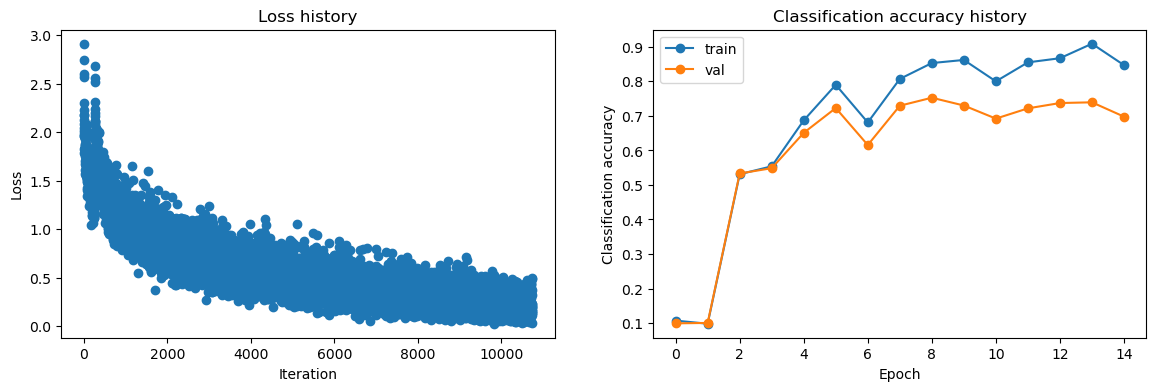

In [7]:
helper.plot_solver(solver)